In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from tb import *

In [2]:
tb = TB(config_file='config_gbv.ini',device_name='CO2')

["cdm4160","cjmcu811","fatal","heartbeat","loadavg1","loadavg15","loadavg5","mh-z14a","notice","sen0219","sen0219avg","sen0219cma","sen0220","t3022","uptime","uptime-linux"]


In [3]:
sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220"]
datos = pd.concat([tb.get_df(key=sensor) for sensor in sensores],axis=1)
# print(datos.head())
datos.index = datos.index + pd.Timedelta("-5H")
# print(datos.head())

In [4]:
#corta los datos de la fecha inicial al final
datos = datos["2021-06-23":]
datos

,cdm4160,cjmcu811,sen0219,t3022,mh-z14a,sen0220
ts,,,,,,
2021-06-23 00:00:02.392,NaN,1159.0,NaN,NaN,NaN,NaN
2021-06-23 00:00:05.123,544.0,NaN,NaN,NaN,NaN,NaN
2021-06-23 00:00:08.483,NaN,1174.0,NaN,NaN,NaN,NaN
2021-06-23 00:00:11.234,486.0,NaN,NaN,NaN,NaN,NaN
2021-06-23 00:00:14.580,NaN,1147.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-06-25 08:25:12.876,NaN,2582.0,NaN,NaN,NaN,NaN
2021-06-25 08:25:13.948,NaN,NaN,984.0,639.0,653.0,NaN
2021-06-25 08:25:14.747,90.0,NaN,NaN,NaN,NaN,NaN


/Users/gbv/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


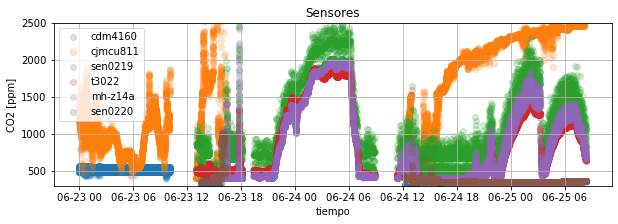

In [5]:
sensores = ["cdm4160","cjmcu811","sen0219","t3022","mh-z14a","sen0220"]

fig, ax = plt.subplots(figsize=(10,3))

# fecha1 = parse("2021-06-22") 
# fecha2 = fecha1 + pd.Timedelta("1D")
# ax.set_xlim(fecha1,fecha2)

ax.set_ylim(300,2500)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo")
ax.set_title("Sensores")
ax.grid()

for sensor in sensores:
    ax.scatter(datos[sensor].index,datos[sensor],label=sensor,alpha=0.2)

ax.legend()



In [6]:
#ajustar fecha si es necesario
datos.to_csv("../data/sensores_20210623_20210625.csv")